https://www.youtube.com/watch?v=ZHVDaunu5X0
### Законы больших чисел и центральная предельная теорема

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt 

#### ***Def*** 
Говорят, что последовательность случайных величин $\xi_{1}, \xi_{2}, ...$ с конечными первыми моментами **удовлетворяют закону больших чисел (ЗБЧ)**, если:
$$\frac{\xi_{1}+...+\xi_{n}}{n} - \frac{E\xi_{1}+...+E\xi_{n}}{n} \xrightarrow[n \rightarrow \infty]{P}0$$

***Theor: ЗБЧ Чебышева***

Для любой последовательности случайных величин $\xi_{1}, \xi_{2}, ...$ попарно независимых и одинаково распределенных случайных величин с конечным вторым моментом $E\xi_{1}^2 < \infty$ имеет место сходимость:
$$\frac{\xi_{1}+...+\xi_{n}}{n} \xrightarrow[n \rightarrow \infty]{P} E\xi_{1}$$
*Замечание:* если слуайные величины одинаково распределены, то их математические ожидания равны.

***Теорема: ЗБЧ Маркова***

Последовательность случайных величин $\xi_{1}, \xi_{2}, ...$ с конечными вторыми моментами, $S_{n}=\xi_{1}+...+\xi_{n}$ удовлетворяют ЗБЧ при выполнении любого из следующих условий, если:

<ul>
    <li> $D_{S_{n}}=\overline{o}(n^2)$,</li>
    <li> $\xi_{1}, \xi_{2}, ...$ независимы и $D_{\xi_{1}}+...+D_{\xi_{n}}=\overline{o}(n^2)$</li>
    <li> $\xi_{1}, \xi_{2}, ...$ независимы, одинаково распределены и имеют конечную дисперсию    
</ul>
 Т.о., ЗБЧ выполнен, если дисперсия суммы n-слагаемых растет не слишком быстро с ростом n.

##### Theor (закон больших чисел Колмагорова)
Пусть $X_{1}, X_{2}, ...$ - независимые одинаково распределенные случайные величины, $S_{n} = X_{1} + X_{2} + ...$ Тогда $\frac {S_{n}}{n} \rightarrow C$ с вероятностью 1 $\Leftrightarrow \exists \, \mathbb{E}X=C$
##### Следствие: 
$\mathbb{E}X_{1} \Rightarrow P(\frac {S_{n}}{n} \xrightarrow[n \rightarrow \infty]{}\mathbb{E}X_{1} ) = 1$

##### Пример: 
Проводится n-испытаний в подбрасывании монеты, где $\nu_{k}$ случайная величина:
$\begin{equation*}
 \nu_{k}=\begin{cases}
   1 \text{, если орел}\\
   0 \text{, если решка}
 \end{cases}, \forall k=0,1, ...
\end{equation*} \,\text{и}\,X_{n}=\sum_{i=1}^{k}\nu_{i}, \; \forall n=1, 2, ...$
<p>   Случайная величина $X_{n}$ задается как количество орлов (число успехов) при подбрасывании k-раз симметричной монеты в каждом испытании, $S_{n} = \sum_{l}^{n}X_{l}$</p>



In [2]:
# ПЕРЕДЕЛАТЬ, лучший пример ниже

k = 30
n = 100
p = 0.5

sample = sts.bernoulli.rvs(p=p, size=k)
print(f'{k} раз подбросили монетку в отдельном испытании', sample)
print(f'доля выпавших орлов: {sample.mean()}', '\n')
print(f'и провели n = {n} испытаний')

exprs = []

for l in range(n):
    X = sts.bernoulli.rvs(p=0.5, size=k)
    exprs.append(X.mean())

res = sum(exprs)/n
print('Т.о. отношение задаваемое ЗБЧ =', res, 
      f', что согласно указанной теореме стремится к математическому ожиданию случайной величины, задаваемой распределением по схеме Бернулли, равное p = {p}')

30 раз подбросили монетку в отдельном испытании [1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1]
доля выпавших орлов: 0.5666666666666667 

и провели n = 100 испытаний
Т.о. отношение задаваемое ЗБЧ = 0.48300000000000004 , что согласно указанной теореме стремится к математическому ожиданию случайной величины, задаваемой распределением по схеме Бернулли, равное p = 0.5


В XX веке исследования Чебышёва и Маркова продолжили А. Я. Хинчин и А. Н. Колмогоров. Они показали, что если случайные величины не только независимы, но и одинаково распределены, то существование у них математического ожидания является необходимым и достаточным условием для применимости закона больших чисел
https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB

[1.98861217]


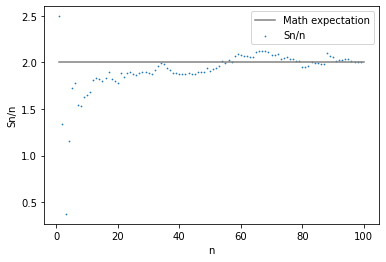

In [3]:
k = 30
n = int(1e2)
alpha = 2
rvs = []
s = 0
summ = []
for i in range(1, n):
    rv = sts.laplace.rvs(loc=alpha, scale=1, size=1)
    rvs.append(rv)
    s += rv
    summ.append(s/i)
    
print(sum(rvs)/n)
xx = np.arange(1, n)
plt.xlabel('n')
plt.ylabel('Sn/n')
plt.plot([1, n], [alpha, alpha], color='grey', label='Math expectation')
plt.scatter(xx, summ, s=0.5, label='Sn/n')
plt.legend()

##### Пример отсутствия матожидания (Петербургская лотерея)
Если впервые орел впервые выпадает при k-м испытании, то выигрышь составляет $2^k$ рублей, тогда:
$P({X^k})= (\frac{1}{2})^k\cdot\frac{1}{2}=\frac{1}{2^k},\forall k=1, 2, ...$

$EX_{1}=\sum_{k=1}^{\infty}2^k \cdot P({X^k})=\sum_{k=1}^{\infty}2^k \cdot \frac{1}{2^k}=\sum_{k=1}^{\infty}1=\infty,\forall k=1, 2, ... \Rightarrow \nexists E$

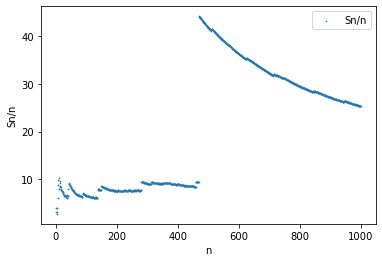

In [4]:
p, size, n = 0.5, 100, 1000
summ = []
rvs = []
s = 0

for exp in range(1, n):
    
    sample = sts.bernoulli.rvs(p=p, size=size)
    for i, rv in enumerate(sample, start=1):

        if rv == 1:
            X = pow(2, i)
            s += X
            summ.append(s/exp)
            rvs.append((sample, X, s, exp))          
            break

plt.xlabel('n')
plt.ylabel('Sn/n')
xx = np.arange(1, n)
plt.scatter(xx, summ, s=0.5, label='Sn/n')
plt.legend()
    

##### Свойство (непрерывность сходимости с вероятностью 1)
Пусть $\xi_{1}, \xi_{2}, ...$ - последовательность случайных величин, $\xi$ - **const**, $\xi_{n} \xrightarrow[n \rightarrow \infty]{п.н.} \xi ,\; g(\xi_{n})$ - непрерывная в точке $\xi$ функция $\Rightarrow g(\xi_{n}) \xrightarrow[n \rightarrow \infty]{п.н.} g(\xi) $ 

##### Пример
Пусть $X_{1}, X_{2}, ...$ - независимые, $\forall i=1,2,..., X_{i} \in E_{\alpha}, \; \alpha>0$, где $E_{\alpha}$-функция плотности показательного распределения. $\lim_{n\to\infty} \frac {n}{X_{1},..., X_{n}}$